In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/dlurie/Dropbox/Projects/withdrawal_can/data/cFosCAN_alcohol_withdrawal_mat_thresh075_CC_20180526.csv', sep=' ', header=None)

In [4]:
labels = pd.read_csv('/Users/dlurie/Dropbox/Projects/withdrawal_can/data/mouse_region_labels.csv')

In [5]:
labels = labels.sort_index()

In [6]:
data.columns = labels.Abbreviation.values

In [7]:
data[data < 0] = 0

In [8]:
G = nx.from_numpy_matrix(data.as_matrix())

In [9]:
nx.set_node_attributes(G, pd.Series.to_dict(labels.Abbreviation), "Region")

In [10]:
netdata = pd.read_csv('/Users/dlurie/Dropbox/Projects/withdrawal_can/results/withdrawal_thresh075/HACPartition_combined_results.csv')

In [11]:
nx.set_node_attributes(G, pd.Series.to_dict(netdata.pc_pos), "PC")

In [12]:
nx.set_node_attributes(G, pd.Series.to_dict(netdata.wmdz_pos), "WMDz")

In [13]:
nx.set_node_attributes(G, pd.Series.to_dict(netdata.partition), "Module")

In [23]:
nx.set_node_attributes(G, pd.Series.to_dict(labels['Allen Group Name']), "Allen")

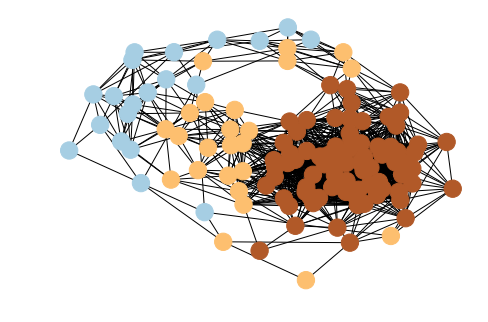

In [26]:
nx.draw_kamada_kawai(G, node_color=netdata.partition.values, 
                        cmap=plt.cm.Paired,)

In [27]:
nx.write_gml(G, '/Users/dlurie/Dropbox/Projects/withdrawal_can/viz/withdrawal_thresh075_HAC.gml')